# Hand-written digits recognition

In [60]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Import MNIST dataset

In [61]:
MNIST = tf.keras.datasets.mnist

### Split data into train and test

In [62]:
(X_train, Y_train), (X_test, Y_test) = MNIST.load_data()

In [63]:
def display_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show()

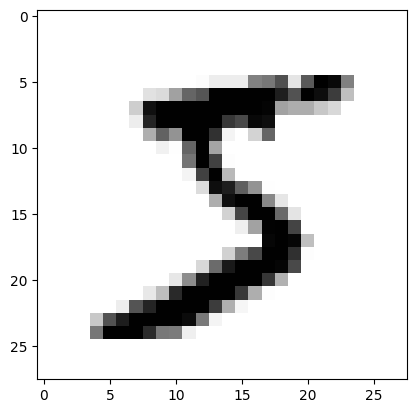

In [64]:
i = 0
display_image(X_train[i])

In [65]:
print(X_train[i])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Normalizing data and pre-processing

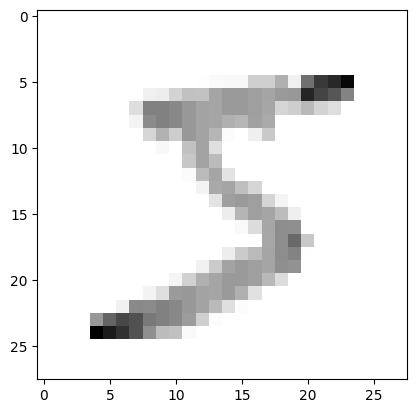

In [66]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

display_image(X_train[i])

In [67]:
print(X_train[i])
print(Y_train[i])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Resize image to can apply convolution

Increasing one dimension in X_train and X_test for kernel operation

In [68]:
IMG_SIZE = 28

X_ctrain = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_ctest = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(f"Train samples dimension: {X_ctrain.shape}")
print(f"Test samples dimension: {X_ctest.shape}")

Train samples dimension: (60000, 28, 28, 1)
Test samples dimension: (10000, 28, 28, 1)


### Create the Neural Network

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [70]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X_ctrain.shape[1: ]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Before fully connected layed, need to be flatten so that 2D => 1D
model.add(Dense(64)) 
model.add(Activation("relu"))

model.add(Dense(32)) 
model.add(Activation("relu"))

model.add(Dense(10)) 
model.add(Activation("softmax"))



c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics = ["accuracy"],
    
)

In [73]:
model.fit(X_ctrain, Y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7979 - loss: 0.6324 - val_accuracy: 0.9511 - val_loss: 0.1572
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.9663 - loss: 0.1110 - val_accuracy: 0.9706 - val_loss: 0.0977
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.9769 - loss: 0.0732 - val_accuracy: 0.9759 - val_loss: 0.0830
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.9829 - loss: 0.0542 - val_accuracy: 0.9696 - val_loss: 0.1062
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9861 - loss: 0.0442 - val_accuracy: 0.9804 - val_loss: 0.0671


In [74]:
test_loss, test_accuracy = model.evaluate(X_ctest, Y_test)

print(f"Test Loss on {len(X_ctest)} test samples: {test_loss}")
print(f"Test Accuracy on {len(X_ctest)} test samples: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9767 - loss: 0.0786
Test Loss on 10000 test samples: 0.06485295295715332
Test Accuracy on 10000 test samples: 0.9811000227928162


In [75]:

predictions = model.predict([X_ctest])


 20/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_137
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


c:\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_137
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


[[1.75200194e-06 7.79782276e-05 8.22401125e-06 ... 9.99861479e-01
  5.08903031e-06 1.50612095e-05]
 [4.29648178e-04 2.19435206e-05 9.99499083e-01 ... 1.17406589e-05
  2.05830179e-06 7.03695878e-06]
 [1.67762630e-06 9.99986053e-01 9.96019267e-08 ... 4.49590004e-07
  2.73820575e-07 1.99513033e-06]
 ...
 [1.03517923e-11 1.61318144e-06 4.39103670e-10 ... 8.05028755e-09
  2.15691193e-06 7.54366312e-08]
 [5.67687894e-05 6.83834278e-09 1.15822019e-08 ... 1.61549815e-10
  1.07575615e-05 9.59274189e-08]
 [1.41741202e-05 2.94813257e-10 8.18014428e-07 ... 7.20941570e-11
  1.02717240e-06 1.00241039e-07]]
8
8


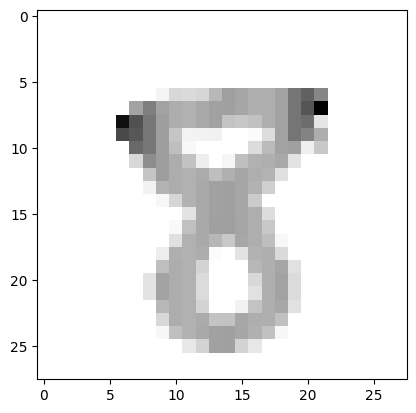

In [76]:
i = 128

print(predictions)
print(np.argmax(predictions[i]))

print(Y_test[i])
display_image(X_test[i])

### Predict from foreign data

In [77]:
import cv2

def pre_processing_and_predict_image(img):
    newImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    newImg = cv2.resize(newImg, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
    newImg =  tf.keras.utils.normalize(newImg, axis=1)
    newImg = np.array(newImg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    display_image(newImg)

    prediction = model.predict([newImg])
    return np.argmax(prediction) 

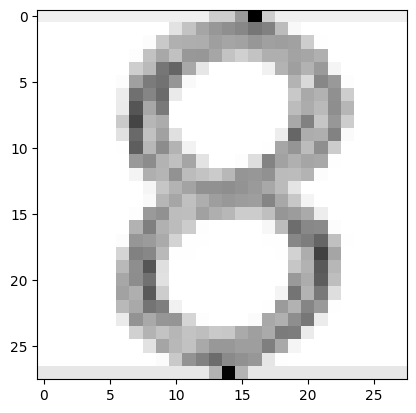

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
prediction to eight is 8


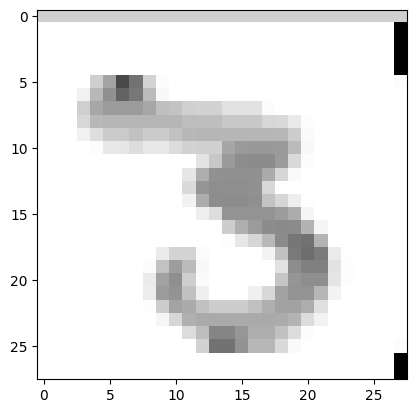

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
prediction to three is 3


In [78]:
img8 = cv2.imread("./public/eight.png")
img3 = cv2.imread("./public/three.png")
print(f"prediction to eight is {pre_processing_and_predict_image(img8)}")
print(f"prediction to three is {pre_processing_and_predict_image(img3)}")